<a href="https://colab.research.google.com/github/PLEX-GR00T/Data_Mining/blob/main/BW2_Professor's_model_with_intel_Acceleration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries and connect to Kaggle

In [5]:
# !pip install intel-tensorflow

In [6]:
# from tensorflow.python.util import _pywrap_util_port
# _pywrap_util_port.IsMklEnabled()

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

In [8]:
print("GPU Available: ", tf.test.is_gpu_available())
# print("GPu Available 2 :", tf.config.list_physical_devices('GPU'))
print("Tensorflow Version: ", tf.__version__)
print("Keras Version: ", tf.keras.__version__)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU Available:  True
Tensorflow Version:  2.8.0
Keras Version:  2.8.0


In [9]:
#check GPU
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(physical_devices)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [10]:
! nvidia-smi

Tue May  3 01:54:06 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    74W / 149W |    145MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [11]:
!pip install kaggle

In [12]:
! mkdir /content/drive/MyDrive/kaggle

mkdir: cannot create directory ‘/content/drive/MyDrive/kaggle’: File exists


In [13]:
!ls /content/drive/MyDrive/kaggle

kaggle.json


In [14]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle"

In [15]:
%cd /content/drive/MyDrive/kaggle

/content/drive/MyDrive/kaggle


# Load Kaggle Data

In [16]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

 99% 605M/612M [00:04<00:00, 136MB/s]
100% 612M/612M [00:04<00:00, 139MB/s]


In [17]:
%ls

kaggle.json


In [18]:
!kaggle config view #View current config values

Configuration values from /content/drive/MyDrive/kaggle
- username: gr00t16
- path: /content
- proxy: None
- competition: None


In [19]:
!kaggle config set -n path -v /content

- path is now set to: /content


In [20]:
#changing the working directory
%cd /content/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
!pwd
!ls

/content/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
/content/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
gtsrb-german-traffic-sign.zip


In [21]:
!unzip gtsrb-german-traffic-sign.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

In [22]:
os.chdir('/content/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign')
!ls 

gtsrb-german-traffic-sign.zip  Meta	 test  Test.csv  Train
meta			       Meta.csv  Test  train	 Train.csv


In [23]:
train_df = pd.read_csv('Train.csv')
# display a sneak peek of the data
train_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [24]:
print(f'Number of classes: {train_df.ClassId.unique().shape[0]}')

Number of classes: 43


In [25]:
labels = ['20 km/h', '30 km/h', '50 km/h', '60 km/h', '70 km/h', '80 km/h', '80 km/h end', '100 km/h', '120 km/h', 'No overtaking',
               'No overtaking for trucks', 'Crossroad with secondary way', 'Main road', 'Give way', 'Stop', 'Road up', 'Road up for truck', 'No entry',
               'Other dangerous', 'Turn left', 'Turn right', 'Winding road', 'Hollow road', 'Slippery road', 'Narrowing road', 'Roadwork', 'Traffic light',
               'Pedestrian', 'Children', 'Bike', 'Snow', 'Deer', 'End of the limits', 'Only right', 'Only left', 'Only straight', 'Only straight and right', 
               'Only straight and left', 'Take right', 'Take left', 'Circle crossroad', 'End of overtaking limit', 'End of overtaking limit for truck']

In [26]:
# add column with readable labels
train_df['Label'] = train_df['ClassId'].replace(sorted(train_df['ClassId'].unique()), labels)
# print updated df
train_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path,Label
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png,Turn right
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png,Turn right
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png,Turn right
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png,Turn right
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png,Turn right


In [27]:
train_df.shape

(39209, 9)

## load these images off disk using 
image_dataset_from_directory
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory
Old solution: Use ImageDataGenerator to rescale the images: https://keras.io/preprocessing/image/

In [28]:
base_dir = '/content/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/Train'
print(base_dir)

/content/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/Train


In [29]:
batch_size = 32
img_height = 28 #180
img_width = 28 #180

In [30]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  base_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 39209 files belonging to 43 classes.
Using 31368 files for training.


In [31]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  base_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 39209 files belonging to 43 classes.
Using 7841 files for validation.


In [32]:
class_names = train_ds.class_names
print(class_names)

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '5', '6', '7', '8', '9']


In [33]:
labels = ['Speed Limit (20Km/H)', 'Speed Limit (30Km/H)','No Passing For Vechiles Over 3.5 Metric Tons','Right-Of-Way At The Next Intersection', 'Priority Road', 'Yield', 'Stop', 'No Vechiles', 'Vechiles Over 3.5 Metric Tons Prohibited', 'No Entry',
 'General Caution', 'Dangerous Curve To The Left', 'Speed Limit (50Km/H)',
 'Dangerous Curve To The Right', 'Double Curve', 'Bumpy Road',
 'Slippery Road', 'Road Narrows On The Right', 'Road Work', 'Traffic Signals',
 'Pedestrians', 'Children Crossing', 'Bicycles Crossing',
 'Speed Limit (60Km/H)', 'Beware Of Ice/Snow', 'Wild Animals Crossing',
 'End Of All Speed And Passing Limits', 'Turn Right Ahead',
 'Turn Left Ahead', 'Ahead Only', 'Go Straight Or Right',
 'Go Straight Or Left', 'Keep Right', 'Keep Left', 'Speed Limit (70Km/H)',
 'Roundabout Mandatory', 'End Of No Passing',
 'End Of No Passing By Vechiles Over 3.5 Metric Tons',
 'Speed Limit (80Km/H)', 'End Of Speed Limit (80Km/H)',
 'Speed Limit (100Km/H)', 'Speed Limit (120Km/H)', 'No Passing']

In [34]:
len(labels)

43

In [35]:
labels[int(class_names[0])] # convert to label

'Speed Limit (20Km/H)'

5
17
9
5
3
18
15
23
32


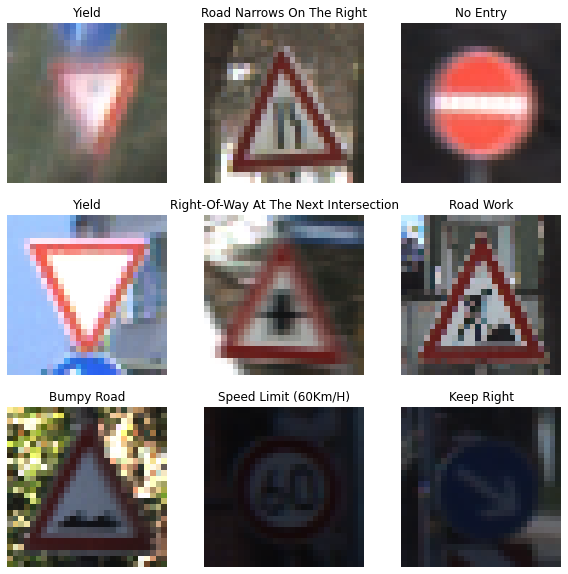

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, groundlabels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    classid=groundlabels[i].numpy()
    print(classid)
    plt.title(labels[classid])
    plt.axis("off")

In [37]:
# manually iterate over the dataset and retrieve batches of images:
# This is a batch of 32 images of shape 180x180x3 (the last dimension referes to color channels RGB). 
# The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 28, 28, 3)
(32,)


In [38]:
image_batch

<tf.Tensor: shape=(32, 28, 28, 3), dtype=float32, numpy=
array([[[[103.61607 ,  93.42857 ,  81.459816],
         [ 93.55357 , 109.79464 , 109.30357 ],
         [140.75446 , 117.55357 , 116.5759  ],
         ...,
         [ 67.49552 ,  57.71874 ,  45.013386],
         [ 79.553566,  68.848206,  51.303574],
         [ 87.102684,  80.04912 ,  55.29018 ]],

        [[ 96.72768 , 113.4375  , 104.28572 ],
         [ 69.90179 ,  87.01785 ,  88.03571 ],
         [172.52232 , 151.64285 , 150.34375 ],
         ...,
         [ 72.79463 ,  59.01339 ,  42.3125  ],
         [ 77.56697 ,  62.852676,  41.638397],
         [ 95.28126 ,  83.75    ,  59.3884  ]],

        [[173.35268 , 155.15625 , 147.5982  ],
         [135.05803 , 103.4241  ,  97.06696 ],
         [113.803566, 124.58035 , 115.21875 ],
         ...,
         [ 80.70088 ,  71.13839 ,  50.000004],
         [ 80.566986,  65.13394 ,  36.35717 ],
         [ 76.28125 ,  64.9375  ,  42.544647]],

        ...,

        [[ 59.450893,  51.245537,  

In [39]:
#Standardize the data, standardize values [0, 255] to be in the [0, 1]
from tensorflow.keras import layers

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

#There are two ways to use this layer. You can apply it to the dataset by calling map:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.031257536 0.40103042


In [40]:
#Configure the dataset for performance
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [41]:
num_classes = len(class_names)
num_classes

43

# Model from Professor's Github.

Model's link : https://github.com/lkk688/MultiModalClassifier/blob/main/TFClassifier/myTFmodels/CNNsimplemodels.py

In [42]:
from tensorflow import keras
from keras.models import Sequential
input_shape = (28,28,3)

In [43]:
## Model 1:  works but gives Overfitting ##
# def create_simplemodel4(numclasses, img_shape, metrics=['accuracy']):
#     data_augmentation = keras.Sequential(
#         [
#             layers.experimental.preprocessing.RandomFlip("horizontal", 
#                                                         input_shape=img_shape),
#             layers.experimental.preprocessing.RandomRotation(0.1),
#             layers.experimental.preprocessing.RandomZoom(0.1),
#         ]
#     )

#     model = Sequential([
#         data_augmentation,
#         #layers.experimental.preprocessing.Rescaling(1./255),
#         layers.Conv2D(16, 3, padding='same', activation='relu'),
#         layers.MaxPooling2D(),
#         layers.Conv2D(32, 3, padding='same', activation='relu'),
#         layers.MaxPooling2D(),
#         layers.Conv2D(64, 3, padding='same', activation='relu'),
#         layers.MaxPooling2D(),
#         layers.Dropout(0.2),
#         layers.Flatten(),
#         layers.Dense(128, activation='relu'),
#         layers.Dense(numclasses)
#         ])
    
#     model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=metrics)
#     return model

# history = create_simplemodel4(num_classes, input_shape, metrics=['accuracy']).fit(
#   train_ds,
#   validation_data=val_ds,
#   epochs=20
# )

In [44]:
#create_simplemodel4(num_classes, input_shape, metrics=['accuracy']).summary()

In [45]:
## Model 2 :
from time import time
start_v1 = time()

def create_simplemodel3(numclasses, img_shape, metrics=['accuracy']):
    model = Sequential([
        #layers.experimental.preprocessing.Rescaling(1./255, input_shape=img_shape),
        layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=img_shape),
        layers.MaxPooling2D(),
        layers.Conv2D(32, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(numclasses) #activation='softmax'
        ])
    
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=metrics)
    return model

model = create_simplemodel3(num_classes, input_shape, metrics=['accuracy'])
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)
finish_v1 = time()

Epoch 1/20
981/981 [==============================] - 32s 22ms/step - loss: 1.5491 - accuracy: 0.6188 - val_loss: 0.5712 - val_accuracy: 0.8398
Epoch 2/20
981/981 [==============================] - 7s 7ms/step - loss: 0.3655 - accuracy: 0.8958 - val_loss: 0.3351 - val_accuracy: 0.9123
Epoch 3/20
981/981 [==============================] - 7s 7ms/step - loss: 0.2117 - accuracy: 0.9396 - val_loss: 0.2359 - val_accuracy: 0.9462
Epoch 4/20
981/981 [==============================] - 7s 7ms/step - loss: 0.1691 - accuracy: 0.9525 - val_loss: 0.2263 - val_accuracy: 0.9481
Epoch 5/20
981/981 [==============================] - 7s 7ms/step - loss: 0.1408 - accuracy: 0.9603 - val_loss: 0.2812 - val_accuracy: 0.9403
Epoch 6/20
981/981 [==============================] - 7s 7ms/step - loss: 0.1294 - accuracy: 0.9638 - val_loss: 0.1959 - val_accuracy: 0.9542
Epoch 7/20
981/981 [==============================] - 7s 7ms/step - loss: 0.1263 - accuracy: 0.9666 - val_loss: 0.2410 - val_accuracy: 0.9524
Epoc

In [46]:
time_taken = finish_v1 - start_v1
print("Time taken by this model with Normal Tensorflow is = ", time_taken)

Time taken by this model with Normal Tensorflow is =  202.59876823425293


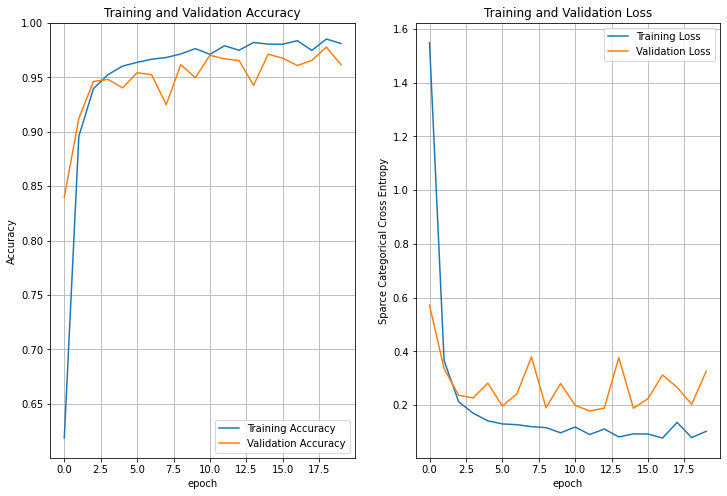

In [47]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(len(acc))

fig=plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.ylim([min(plt.ylim()),1])
plt.grid(True)
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Sparce Categorical Cross Entropy')
plt.xlabel('epoch')
plt.grid(True)
plt.title('Training and Validation Loss')
plt.show()
fig.savefig('traininghistory.pdf')

In [48]:
%cd /content/

/content


In [49]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/my_model')
model.save('my_model.h5')

INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [50]:
!ls saved_model/my_model

assets	keras_metadata.pb  saved_model.pb  variables


In [51]:
!cp /content/my_model.h5 /content/drive/MyDrive/255-04/Bonus_Work_2

# Part 2 : Nvidia Acceleration with Tensorflow

In [52]:
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '1'

In [53]:
## Model 2 :
from time import time
start_v2 = time()

def create_simplemodel3(numclasses, img_shape, metrics=['accuracy']):
    model = Sequential([
        #layers.experimental.preprocessing.Rescaling(1./255, input_shape=img_shape),
        layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=img_shape),
        layers.MaxPooling2D(),
        layers.Conv2D(32, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(numclasses) #activation='softmax'
        ])
    
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=metrics)
    return model

model = create_simplemodel3(num_classes, input_shape, metrics=['accuracy'])
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)
finish_v2 = time()

Epoch 1/20
981/981 [==============================] - 8s 7ms/step - loss: 1.8419 - accuracy: 0.5756 - val_loss: 0.6210 - val_accuracy: 0.8234
Epoch 2/20
981/981 [==============================] - 7s 7ms/step - loss: 0.3685 - accuracy: 0.8951 - val_loss: 0.2393 - val_accuracy: 0.9361
Epoch 3/20
981/981 [==============================] - 7s 7ms/step - loss: 0.2025 - accuracy: 0.9418 - val_loss: 0.2474 - val_accuracy: 0.9309
Epoch 4/20
981/981 [==============================] - 7s 7ms/step - loss: 0.1623 - accuracy: 0.9527 - val_loss: 0.2911 - val_accuracy: 0.9338
Epoch 5/20
981/981 [==============================] - 7s 7ms/step - loss: 0.1372 - accuracy: 0.9629 - val_loss: 0.2683 - val_accuracy: 0.9342
Epoch 6/20
981/981 [==============================] - 7s 7ms/step - loss: 0.1317 - accuracy: 0.9651 - val_loss: 0.2294 - val_accuracy: 0.9435
Epoch 7/20
981/981 [==============================] - 7s 7ms/step - loss: 0.1049 - accuracy: 0.9713 - val_loss: 0.1925 - val_accuracy: 0.9600
Epoch 

In [54]:
time_taken = finish_v2 - start_v2
print("Time taken by this model with Normal Tensorflow is = ", time_taken)

Time taken by this model with Normal Tensorflow is =  174.77821683883667


# Part 3 : Acceleration Comparison

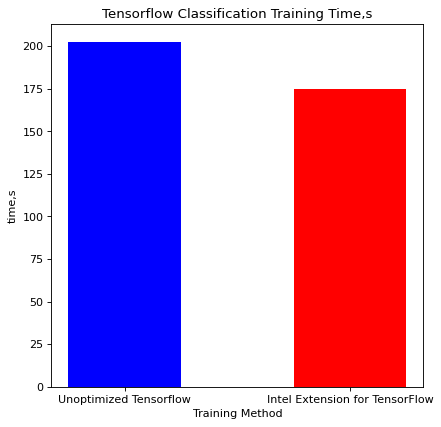

Performance Speedup:  1.1591763086876532


In [55]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(6,6), dpi=80)
left = [1,2]
pred_times = [finish_v1 - start_v1, finish_v2 - start_v2]
tick_label = ['Unoptimized Tensorflow','Intel Extension for TensorFlow']
ax = plt.bar(left, pred_times, tick_label = tick_label, width = 0.5, color = ['blue', 'red'])
plt.xlabel('Training Method'); plt.ylabel('time,s'); plt.title('Tensorflow Classification Training Time,s')
plt.show()
print("Performance Speedup: ",(finish_v1 - start_v1)/(finish_v2 - start_v2))

# Part 2 : TensorRT


In [ ]:
%%bash
wget https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64/nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb

dpkg -i nvidia-machine-learning-repo-*.deb
apt-get update

sudo apt-get install libnvinfer8

In [ ]:
# check TensorRT version
print("TensorRT version: ")
!dpkg -l | grep nvinfer

In [ ]:
from tensorflow.python.client import device_lib

def check_tensor_core_gpu_present():
    local_device_protos = device_lib.list_local_devices()
    for line in local_device_protos:
        if "compute capability" in str(line):
            compute_capability = float(line.physical_device_desc.split("compute capability: ")[-1])
            if compute_capability>=7.0:
                return True
    
print("Tensor Core GPU Present:", check_tensor_core_gpu_present())
tensor_core_gpu = check_tensor_core_gpu_present()

In [ ]:
img_path = '/content/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign'
model_path = '/content/drive/MyDrive/255-04/Bonus Work 2/'

In [ ]:
%cd /content/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/Test

In [ ]:
from tensorflow.keras.preprocessing import image

fig, axes = plt.subplots(nrows=2, ncols=2)

for i in range(4):
  img_path = './0000%d.png' % (i % 4)
  print(img_path)
  img = image.load_img(img_path, target_size=(28, 28))
  plt.subplot(2,2,i+1)
  plt.imshow(img);
  plt.axis('off');

In [ ]:
# from tensorflow.keras.preprocessing import image
# img = image.load_img(img_path, target_size=(28, 28))
# plt.imshow(img)

In [ ]:
%cd /content
model = tf.keras.models.load_model('my_model.h5')

In [ ]:
%cd /content/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/Test
for i in range(4):
  img_path = './0000%d.png'%i
  img = image.load_img(img_path, target_size=(28, 28))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  preds = model.predict(x)
  print("prediction shape:", preds.shape)
  classes = np.argmax(preds, axis = 1)
  print('Predicted Image class:', labels[int(classes)])
  plt.subplot(2,2,i+1)
  plt.imshow(img);
  plt.axis('off');

In [ ]:
# img = image.load_img(img_path, target_size=(28, 28))
# x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)

# preds = model.predict(x)

# print("prediction shape:", preds.shape)
# classes = np.argmax(preds, axis = 1)
# print('Predicted Image class:',classes)
# plt.imshow(img)

In [ ]:
# Save the entire model as a SavedModel.
model.save('TF-TRT_saved_model') 

In [ ]:
!saved_model_cli show --all --dir TF-TRT_saved_model

### Inference with native TF2.0 saved model

In [ ]:
model = tf.keras.models.load_model('TF-TRT_saved_model')

In [ ]:
%cd /content/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/Test
img_path = './00000.png' 
img = image.load_img(img_path, target_size=(28, 28))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

preds = model.predict(x)
print("prediction shape:", preds.shape)
classes = np.argmax(preds, axis = 1)
print('Predicted Image class:', labels[int(classes)])
plt.subplot(2,2,i+1)
plt.imshow(img);
plt.axis('off');

In [ ]:
batch_size = 8
batched_input = np.zeros((batch_size, 28, 28, 3), dtype=np.float32)

for i in range(batch_size):
  img_path = './0000%d.png' % (i % 4)
  img = image.load_img(img_path, target_size=(28, 28))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  batched_input[i, :] = x
batched_input = tf.constant(batched_input)
print('batched_input shape: ', batched_input.shape)

In [ ]:
# Benchmarking throughput
import time
N_warmup_run = 50
N_run = 1000
elapsed_time = []

for i in range(N_warmup_run):
  preds = model.predict(batched_input)

for i in range(N_run):
  start_time = time.time()
  preds = model.predict(batched_input)
  end_time = time.time()
  elapsed_time = np.append(elapsed_time, end_time - start_time)
  if i % 50 == 0:
    print('Step {}: {:4.1f}ms'.format(i, (elapsed_time[-50:].mean()) * 1000))

print('Throughput: {:.0f} images/s'.format(N_run * batch_size / elapsed_time.sum()))

### TF-TRT FP32 model

We first convert the TF native FP32 model to a TF-TRT FP32 model.

In [ ]:
import tensorflow as tf
print("Tensorflow version: ", tf.version.VERSION)

In [ ]:
from tensorflow.python.compiler.tensorrt import trt_convert as trt

In [ ]:
trt.trt_utils._pywrap_py_utils.get_linked_tensorrt_version()

In [ ]:
trt.trt_utils._pywrap_py_utils.get_loaded_tensorrt_version()

In [ ]:
%cd /content

In [ ]:
!dpkg -l | grep TensorRT

In [ ]:
!sudo apt-get install libnvinfer8

In [ ]:
!!!rsfgfff!nvcc --version

In [ ]:
from tensorflow.compiler.tf2tensorrt.wrap_py_utils import get_linked_tensorrt_version
from tensorflow.compiler.tf2tensorrt.wrap_py_utils import get_loaded_tensorrt_version

print(f"Linked TensorRT version {get_linked_tensorrt_version()}")
print(f"Loaded TensorRT version {get_loaded_tensorrt_version()}")

In [ ]:
from tensorflow.python.compiler.tensorrt import trt_convert as trt

# Conversion Parameters 
conversion_params = trt.TrtConversionParams(
    precision_mode=trt.TrtPrecisionMode.INT8)

converter = trt.TrtGraphConverterV2(
    input_saved_model_dir='TF-TRT_saved_model',
    conversion_params=conversion_params)

# Converter method used to partition and optimize TensorRT compatible segments
converter.convert()

# Optionally, build TensorRT engines before deployment to save time at runtime
# Note that this is GPU specific, and as a rule of thumb, we recommend building at runtime
# converter.build(input_fn=my_input_fn)

# Save the model to the disk 
converter.save('saved_model_TFTRT_FP32')
print('Done Converting to TF-TRT FP32')

In [ ]:
from tensorflow.python.compiler.tensorrt import trt_convert as trt

print('Converting to TF-TRT FP32...')
conversion_params = trt.DEFAULT_TRT_CONVERSION_PARAMS._replace(precision_mode=trt.TrtPrecisionMode.FP32,
                                                               max_workspace_size_bytes=8000000000)

converter = trt.TrtGraphConverterV2(input_saved_model_dir='TF-TRT_saved_model',
                                    conversion_params=conversion_params)
converter.convert()
converter.save(output_saved_model_dir='TF-TRT_saved_model_TFTRT_FP32')
print('Done Converting to TF-TRT FP32')